In [1]:
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import urllib
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from fiona.crs import from_epsg
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import sys
sys.path.append("..")
import movingpandas as mpd
print(mpd.__version__)

import warnings
#warnings.simplefilter("ignore")

0.5.rc1


In [ ]:
# Michal Piorkowski, Natasa Sarafijanovic‑Djukic, Matthias Grossglauser, CRAWDAD dataset epfl/mobility (v. 2009‑02‑24), downloaded from https://crawdad.org/epfl/mobility/20090224, https://doi.org/10.15783/C7J010, Feb 2009.

In [3]:
%%time
df = read_file('/home/slautenb/Documents/lehre/HD/ws_2020_21/heikaLab/urbandatascience/Tag3/data/new_abboip.csv')
df.crs = 4326
print("Finished reading {}".format(len(df)))

Finished reading 23495
CPU times: user 385 ms, sys: 20 ms, total: 405 ms
Wall time: 417 ms


In [4]:
df.head()

no       Lat         Lon Fare        Time  CabID geometry
0  1  37.75153  -122.39447    0  1211033530  30788     None
1  2  37.75149  -122.39447    0  1211033614  30788     None
2  3  37.75149  -122.39447    0  1211033674  30788     None
3  4  37.75149  -122.39446    0  1211033735  30788     None
4  5  37.75144  -122.39449    0  1211035303  30788     None

In [5]:
df['t'] = pd.to_datetime(df['Time'], unit='s')
df = df.set_index('t').tz_localize(None)

In [6]:
df['time'] = pd.to_datetime(df['Time'], unit='s')

In [7]:
print("The dataset covers the time between {} and {}.".format(df.time.min(), df.time.max()))

The dataset covers the time between 2008-05-17 14:12:10 and 2008-06-10 07:58:07.


In [8]:
df['x'] = df['Lon'].astype(float)
df['y'] = df['Lat'].astype(float)

In [9]:
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

<AxesSubplot:>

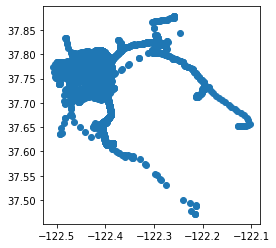

In [10]:
df.plot()

In [11]:
df.hvplot(title='Geographic extent of the dataset', geo=True, tiles='OSM', width=500, height=500)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [13]:
tc = mpd.Trajectory(df, "no", "CabID")

/home/slautenb/anaconda3/envs/geo38c/lib/python3.7/site-packages/movingpandas/trajectory.py:81: MissingCRSWarning: Trajectory generated without CRS! Computations will use Euclidean distances.
  category=MissingCRSWarning)


In [14]:
tc.add_speed(overwrite=True)

In [15]:
tc.df

no       Lat         Lon Fare        Time  CabID  \
t                                                                          
2008-05-17 14:12:10      1  37.75153  -122.39447    0  1211033530  30788   
2008-05-17 14:13:34      2  37.75149  -122.39447    0  1211033614  30788   
2008-05-17 14:14:34      3  37.75149  -122.39447    0  1211033674  30788   
2008-05-17 14:15:35      4  37.75149  -122.39446    0  1211033735  30788   
2008-05-17 14:41:43      5  37.75144  -122.39449    0  1211035303  30788   
...                    ...       ...         ...  ...         ...    ...   
2008-06-10 07:50:37  23491  37.75015  -122.39256    0  1213084237  30788   
2008-06-10 07:54:49  23492   37.7508  -122.39346    0  1213084489  30788   
2008-06-10 07:55:40  23493  37.75199   -122.3946    0  1213084540  30788   
2008-06-10 07:57:39  23494  37.75136  -122.39527    0  1213084659  30788   
2008-06-10 07:58:07  23495  37.75134  -122.39488    0  1213084687  30788   

                                        geometry                time  \
t                                                                      
2008-05-17 14:12:10  POINT (-122.39447 37.75153) 2008-05-17 14:12:10   
2008-05-17 14:13:34  POINT (-122.39447 37.75149) 2008-05-17 14:13:34   
2008-05-17 14:14:34  POINT (-122.39447 37.75149) 2008-05-17 14:14:34   
2008-05-17 14:15:35  POINT (-122.39446 37.75149) 2008-05-17 14:15:35   
2008-05-17 14:41:43  POINT (-122.39449 37.75144) 2008-05-17 14:41:43   
...                                          ...                 ...   
2008-06-10 07:50:37  POINT (-122.39256 37.75015) 2008-06-10 07:50:37   
2008-06-10 07:54:49  POINT (-122.39346 37.75080) 2008-06-10 07:54:49   
2008-06-10 07:55:40  POINT (-122.39460 37.75199) 2008-06-10 07:55:40   
2008-06-10 07:57:39  POINT (-122.39527 37.75136) 2008-06-10 07:57:39   
2008-06-10 07:58:07  POINT (-122.39488 37.75134) 2008-06-10 07:58:07   

                             x         y         speed  
t                                                       
2008-05-17 14:12:10 -122.39447  37.75153  4.761905e-07  
2008-05-17 14:13:34 -122.39447  37.75149  4.761905e-07  
2008-05-17 14:14:34 -122.39447  37.75149  0.000000e+00  
2008-05-17 14:15:35 -122.39446  37.75149  1.639344e-07  
2008-05-17 14:41:43 -122.39449  37.75144  3.718719e-08  
...                        ...       ...           ...  
2008-06-10 07:50:37 -122.39256  37.75015  7.332614e-05  
2008-06-10 07:54:49 -122.39346  37.75080  4.405477e-06  
2008-06-10 07:55:40 -122.39460  37.75199  3.231251e-05  
2008-06-10 07:57:39 -122.39527  37.75136  7.728352e-06  
2008-06-10 07:58:07 -122.39488  37.75134  1.394687e-05  

[23495 rows x 11 columns]

In [16]:
tc.df['speed'].max()

0.052643728021482365

In [17]:
tc.hvplot(c='speed', width=700, height=400, line_width=7.0, tiles='StamenTonerBackground', cmap='Viridis', colorbar=True, clim=(0,20))

/home/slautenb/anaconda3/envs/geo38c/lib/python3.7/site-packages/movingpandas/trajectory.py:81: MissingCRSWarning: Trajectory generated without CRS! Computations will use Euclidean distances.
  category=MissingCRSWarning)


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (speed)

In [ ]:
df['no'].resample('D').count().hvplot(title='Number of records per day')

In [ ]:
df['W-M'] = df.index.to_period('W')
a = None
for i in df['W-M'].unique():
    plot = df[df['W-M']==i].hvplot(title=str(i), size=2, geo=True, tiles='OSM', width=300, height=300)
    if a: a = a + plot
    else: a = plot
a

In [ ]:
daily = mpd.TemporalSplitter(tc).split(mode='day')

In [ ]:
a = None
for i in range(0,7):
    if a: a = a + daily.trajectories[i].hvplot(title=daily.trajectories[i].id, c='speed', line_width=2, cmap='RdYlBu', width=300, height=300)
    else: a = daily.trajectories[i].hvplot(title=daily.trajectories[i].id, c='speed', line_width=2, cmap='RdYlBu', width=300, height=300)
a

In [ ]:
pd.DataFrame(tc.df).hvplot.heatmap(title='Mean speed by hour of day and week', 
                                     x='t.hour', y='t.week', C='speed', reduce_function=np.mean)

In [ ]:
tc.df['n'] = 1
pd.DataFrame(tc.df).hvplot.heatmap(title='Record count by occupancy and day', 
                                     x='Fare', y='t.day', C='n', reduce_function=np.sum)

In [ ]:
pd.DataFrame(tc.df).hvplot.heatmap(title='Mean speed by passenger and day', 
                                     x='Fare', y='t.day', C='speed', reduce_function=np.mean)